# In Depth: Linear Regression

Linear regression models are a good starting point for regression tasks.
Such models are popular because they can be fit very quickly, and are very interpretable.
You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

In this section we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how before moving on to see how linear models can be generalized to account for more complicated patterns in data.


## Import Required Libraries

**Note:** You can tell the difference between a class and a function by the case sensivity. 

- A **class** will be captialized
- A **function** will be lowercase
- A **method**, or a function belonging to a class, will also be lowercase. You can call a method by invoking it through an instance of a class (instance method), or through a class definition (static method)

References: 
- [Understanding what a class is](https://www.hackerearth.com/practice/python/object-oriented-programming/classes-and-objects-i/tutorial/)
- [Differences between functions and methods](https://www.tutorialspoint.com/difference-between-method-and-function-in-python)
- [Different types of methods](https://www.bogotobogo.com/python/python_differences_between_static_method_and_class_method_instance_method.php)





In [0]:
# Collection libraries 
import numpy as np
import pandas as pd

# Visual libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Helper for splitting training and testing data
from sklearn.model_selection import train_test_split

# Models/Estimators
from sklearn.linear_model import LinearRegression

#### Notes about imports with this notebook:
We will re-import some of the libraries when we use these modules, this is to get you used to importing and understanding their classes and functions. Reference the documentation to understand the libraries classes, methods, and functions. 

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$

where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

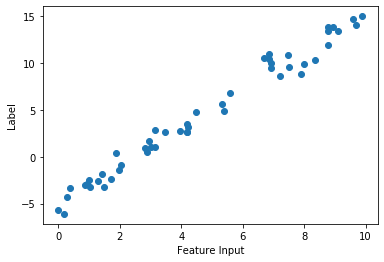

In [0]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);
plt.xlabel(xlabel="Feature Input")
plt.ylabel(ylabel="Label")
plt.show()

## Create Model
We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

- [Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Steps: 

1. Import the model class
2. Create an instance of this model class by invoking the constructor with the desired hyper-parameters 

### Import `LinearRegression` Model/Estimator From Sklearn's Library

In [0]:
from sklearn.linear_model import LinearRegression

### Create Model
We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

Steps: 

1. Make sure the model class / blueprint is imported
2. Create an instance of this model class / blueprint by invoking the constructor with the desired hyper-parameters 

Requirements: 
- Set the `fit_intercept` hyper-parameter to `True` for this model

[Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [0]:
model = LinearRegression(fit_intercept=True)

## Fit Model

Note, when we pass in the first parameter we are converting the x vector (1D) to a X Matrix (2D). We do this by slicing and passing in `np.newaxis` as the first argument. 



In [0]:
model.fit(x[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Generate data to test our models prediction

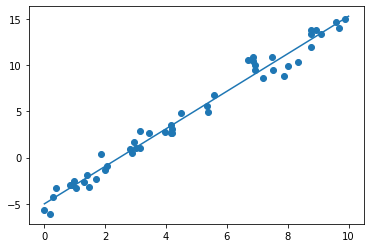

In [0]:
xfit = np.linspace(0, 10, 1000) # create 1000 data points with values evenly spaced between 0 and 10 
yfit = model.predict(xfit[:, np.newaxis]) 

# print("xfit /n", xfit)
# print("yfit /n", yfit)

plt.scatter(x, y)
plt.plot(xfit, yfit); # create line plot to visualize the model ("line)

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [0]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


We see that the results are very close to the inputs, as we might hope.

Here the $y$ data is constructed from random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
We have seen one version of this before, in the ``PolynomialRegression`` pipeline used in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) and [Feature Engineering](05.04-Feature-Engineering.ipynb).
The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.